# Statistique en Grande Dimension et Apprentissage - TP 1


## Exercice 1

### 1. 

In [1]:
def Echantillon(n):
    
    X1 = np.random.uniform(0,1,n)
    X2 = np.random.uniform(0,1,n)
    V = X1 + 2*X2
    Y = np.zeros(n)
    
    Y[V <= 1] = [int(alpha >= np.random.uniform(0,1,1)[0]) for i in range(np.sum(V <= 1))]
    Y[V > 1] = [int(beta >= np.random.uniform(0,1,1)[0]) for i in range(np.sum(V > 1))]
    
    return pd.DataFrame({'X1': X1,'X2': X2,'Y': Y.astype(int)})

### 2.

In [2]:
from random import *
import numpy as np
import pandas as pd


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


n = 100
alpha = 0.9
beta = 0.1

df_train = Echantillon(n)
df_test = Echantillon(n)

### 3.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x="X1", y="X2", hue="Y", style = "Y", data=df_train, s =100)

### 4.

In [4]:
Xtrain,Ytrain = df_train[["X1","X2"]], df_train["Y"]
Xtest,Ytest = df_test[["X1","X2"]], df_test["Y"]

In [5]:
from sklearn.neighbors import KNeighborsClassifier


Poids = ["uniform", "distance"]
p = Poids[0]

k = 1

knn = KNeighborsClassifier(n_neighbors=k, weights = p)
knn.fit(Xtrain, Ytrain) 

print(knn.predict([[0.5, 0.5]]))
print(knn.predict([[1/4, 3/4]]))

[0]
[1]


### 5.


In [6]:
# Pour k = 1 :
knn = KNeighborsClassifier(n_neighbors=1, weights = p)
knn.fit(Xtrain, Ytrain)
k1 = knn.predict(Xtest)

# pour k = 20 :
knn = KNeighborsClassifier(n_neighbors=20, weights = p)
knn.fit(Xtrain, Ytrain)
k20 = knn.predict(Xtest)

pd.DataFrame({"knn[K=1]": k1, "knn[K=20]": k20})

,knn[K=1],knn[K=20]
0,0,0
1,0,0
2,1,0
3,1,1
4,0,1
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


### 6. 

In [7]:
from sklearn.metrics import confusion_matrix

print("matrice de confusion avec k=1")
M1 = confusion_matrix(Ytest, k1)
M1

matrice de confusion avec k=1


array([[62, 10],
       [ 9, 19]])

In [8]:
print("matrice de confusion avec k=20")
M20 = confusion_matrix(Ytest, k20)
M20

matrice de confusion avec k=20


array([[64,  8],
       [ 8, 20]])

### 7.

In [9]:
print("Précision de classification avec k=1:", M1.trace()/M1.sum())
print("Précision de classification avec k=20:", M20.trace()/M20.sum())

Précision de classification avec k=1: 0.81
Précision de classification avec k=20: 0.84


### 8.

In [10]:
Voisins = np.arange(1,21)
Precision = []

for i in Voisins:
    knn = KNeighborsClassifier(n_neighbors=i, weights = p)
    knn.fit(Xtrain, Ytrain)
    M = confusion_matrix(Ytest, knn.predict(Xtest))
    Precision.append(M.trace()/M.sum())
    
df_Erreur = pd.DataFrame({"Voisins": Voisins, "Précision": Precision})
df_Erreur

,Voisins,Précision
0,1,0.81
1,2,0.84
2,3,0.88
3,4,0.87
4,5,0.88
5,6,0.87
6,7,0.87
7,8,0.88
8,9,0.86
9,10,0.86


<Figure size 576x576 with 0 Axes>

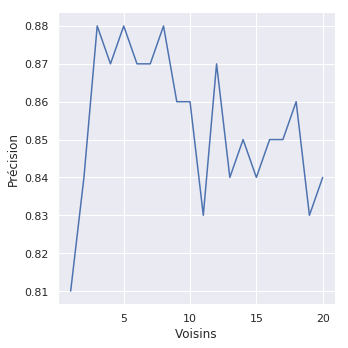

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.relplot(x="Voisins", y="Précision", kind="line", data=df_Erreur)

### 9.

##### a. validation croisée de type Leave-One-Out

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

#on regroupe les données pour la validation croisée
df = pd.concat([df_train,df_test], ignore_index=True)
X, Y = df[["X1","X2"]], df["Y"]

loo = LeaveOneOut()
knn_cv = KNeighborsClassifier(n_neighbors=11, weights = p)
cv_scores = cross_val_score(knn_cv, X, Y, cv=loo)

print(cv_scores)
print("moyenne des scores:", np.mean(cv_scores))

[0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1.]
moyenne des scores: 0.87


##### b. programmant d'une validation croisée  avec 5-fold

In [13]:
cv = 5
Voisins = np.arange(1,21)

I=np.arange(df.shape[0])
taillefold = int(df.shape[0]/cv)

Cross_V = {}


for k in Voisins:  
    Precision = []

    for i in range(cv):
        
        Iv = I[i*taillefold: (i+1)*taillefold]
        
        Xtrain=X.drop(Iv, axis=0)
        Ytrain=Y.drop(Iv, axis=0)

        Xtest=X.iloc[Iv]
        Ytest=Y.iloc[Iv]
    
        knn = KNeighborsClassifier(n_neighbors=k, weights = p)
        knn.fit(Xtrain, Ytrain)
        M = confusion_matrix(Ytest, knn.predict(Xtest))
        Precision.append(M.trace()/M.sum())

    Cross_V [k] = round((np.array(Precision)).mean(), 4) 

In [14]:
print("k:" ,max(zip(Cross_V.values(), Cross_V.keys()))[1])
print("précision:" ,max(zip(Cross_V.values(), Cross_V.keys()))[0])

k: 3
précision: 0.85


<Figure size 576x576 with 0 Axes>

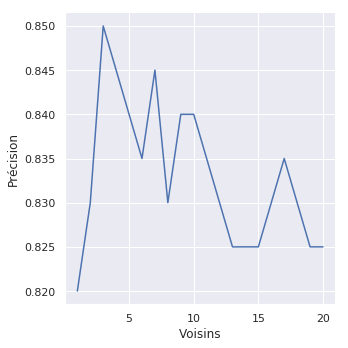

In [15]:
df_CV = pd.DataFrame({'Voisins'   : list(Cross_V.keys()),
                      'Précision' : list(Cross_V.values())})
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.relplot(x="Voisins", y="Précision", kind="line", data=df_CV)

In [16]:
from sklearn.model_selection import GridSearchCV

#on crée un nouveau modèle knn2
knn2 = KNeighborsClassifier()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester avec n_neighbors
param_grid = {"n_neighbors": np.arange(1, 21), "weights" : ["uniform", "distance"]}

#on utilise gridsearch pour tester toutes les valeurs de n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#ajustement du modèle aux données
knn_gscv.fit(X, Y)

/home/malick/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
#la valeur de n_neighbors la plus performante:
knn_gscv.best_params_

{'n_neighbors': 16, 'weights': 'distance'}

In [18]:
#le score moyen pour la valeur la plus performante de n_neighbors
knn_gscv.best_score_

0.88